# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах(м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [2]:
df=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
print(df['total_area'].corr(df['last_price']))

0.6536750579657244


### Вывод

В файле представлено 23699 наблюдений с 22 колонками. Некоторые колонки не заполнены полностью, данные пропуски нужно проанализировать на следующем шаге. 

### Шаг 2. Предобработка данных

In [8]:
# Для начала заменю тип данных с вещественного на временной в колонке first_day_exposition
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [9]:
# Дубликаты отсутствуют
# df.duplicated().sum()

In [10]:
# В большинстве столбцов имеются пропущенные значения
pd.concat([df.isna().sum().to_frame(name='Количество пропущенных значений'),
           (df.isna().sum()/len(df)).to_frame(name='Доля пропущенных значений').round(3)],axis=1).sort_values(by='Количество пропущенных значений',ascending=False)

,Количество пропущенных значений,Доля пропущенных значений
is_apartment,20924,0.883
parks_nearest,15620,0.659
ponds_nearest,14589,0.616
balcony,11519,0.486
ceiling_height,9195,0.388
airports_nearest,5542,0.234
cityCenters_nearest,5519,0.233
ponds_around3000,5518,0.233
parks_around3000,5518,0.233
days_exposition,3181,0.134


##### Проанализируем пропущенные значения

In [11]:
# Так, в столбце is_appartment пропущено более 88%. При этом заполнена она только показателями True и False
print(df.is_apartment.value_counts())

# Исходя из описания, предполагается, является ли эта квартира апартаментом, предлагаю заменить все значения на False, так как
# на российском рынке доля апартаментов действительно очень маленькая
df.is_apartment=df.is_apartment.fillna(False)

False    2725
True       50
Name: is_apartment, dtype: int64


441.0     67
173.0     41
392.0     41
456.0     40
471.0     32
          ..
863.0      1
2880.0     1
969.0      1
1011.0     1
775.0      1
Name: parks_nearest, Length: 995, dtype: int64


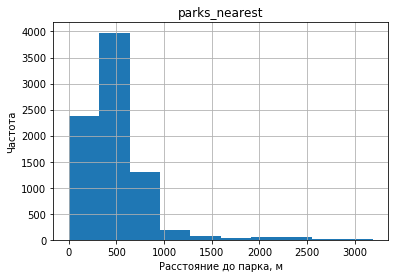

In [12]:
# В столбце park_nearest пропущено более 65% значений. Данные представлены в виде int, показывающие на каком расстоянии находится
# в метрах

print(df.parks_nearest.value_counts())
df.parks_nearest.hist()
plt.title('parks_nearest')
plt.xlabel('Расстояние до парка, м',color='black')
plt.ylabel('Частота')
plt.show()

В среднем пользователи указывали до ближайшего парка 500 метров и в редких случаях более 1000м. 
Предполагаю, что пропущенные значения неслучайны, а предполагается, что ближайший парк находится на таком большом расстонии, что его наличие или отсутствие не влияет на цену квартиры.
Поэтому заполнять тут нулевым, средним или медианным значением считаю некорректным

In [13]:
# Действительно, парков в радиусе 3км нет. И это более 43%  до заполнения пропусков.

print(df[df.parks_around3000==0].parks_nearest.isna().sum())

print(df[df.parks_around3000==0].parks_nearest.isna().sum()/len(df.parks_nearest))


10102
0.4262627115068146


В колонке parks_around3000 всего пропущено 23%. Можно предположить, что такие пропуски случились по той причине, что пользователи не закотели указывать на отсутствующий парк, поэтому предлагаю заполнить пропуск 0

In [14]:
df.parks_around3000=df.parks_around3000.fillna(0)

In [15]:
# Тогда доля объявлений без парков вырастимт до 66%

print(df[df.parks_around3000==0].parks_nearest.isna().sum())

print(df[df.parks_around3000==0].parks_nearest.isna().sum()/len(df.parks_nearest))

15620
0.6590995400649816


В большинстве своем пользователи указывают 1 парк, находящегося в радиусе от 648м до 3190.

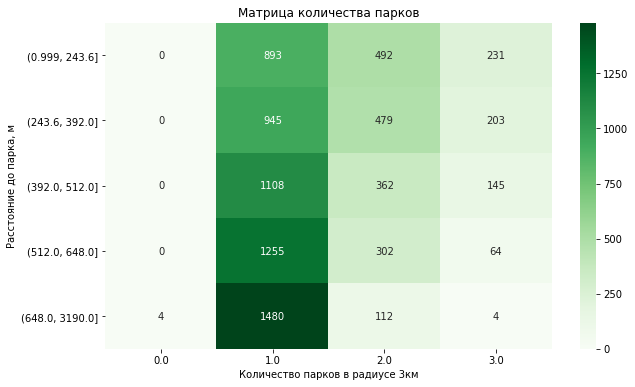

In [16]:
# 4 в нижнем левом углу может говорить о том, что существует 4 парка, которые находятся дальше, чем 3км от квартиры
plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(pd.qcut(df.parks_nearest,5),df.parks_around3000),annot=True,cmap='Greens',fmt='.0f')
plt.title('Матрица количества парков')
plt.ylabel('Расстояние до парка, м',color='black')
plt.xlabel('Количество парков в радиусе 3км')
plt.show()

In [17]:
# Действительно, так и есть
df[df.parks_nearest>3000][['parks_nearest','parks_around3000']]

,parks_nearest,parks_around3000
1590,3064.0,0.0
10959,3190.0,0.0
19208,3013.0,0.0
19430,3190.0,0.0


23% пропусков имеет колонка ponds_around3000. Предлагаю также пропущенные значения заменить на 0, так как
Пропуски могут быть связаны с тем, что пользователи не захотели указывать отсутствие отсутвующего пруда

In [18]:

df.ponds_around3000=df.ponds_around3000.fillna(0)


В основном пользователи не имеют ни парков, ни прудов. Петербург - совсем не зеленый город.

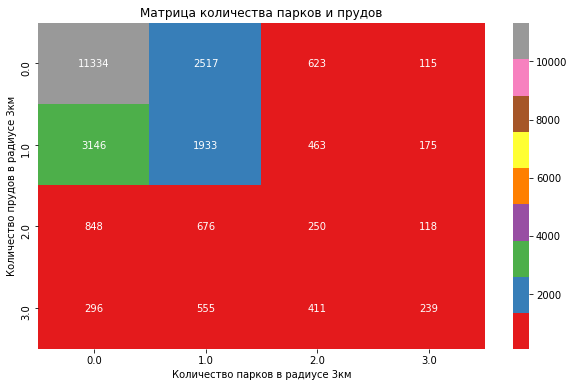

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(df.ponds_around3000,df.parks_around3000),annot=True,cmap='Set1',fmt='.0f')
plt.title('Матрица количества парков и прудов')
plt.ylabel('Количество прудов в радиусе 3км',color='black')
plt.xlabel('Количество парков в радиусе 3км')
plt.show()

В колонке balcony пропущено более 48%. Предполагаю, что большинство пропущенных значений связано с тем,
что многие не стали указывать отсутствующий балкон, поэтому можно пропущенные значения заменить на 0

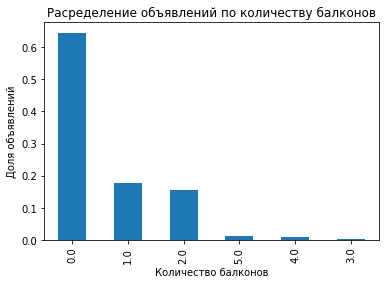

In [20]:

df.balcony=df.balcony.fillna(0)
df.balcony.value_counts(normalize=True).plot(kind='bar')
plt.title('Расределение объявлений по количеству балконов')
plt.ylabel('Доля объявлений')
plt.xlabel('Количество балконов')
plt.show()

Большинство пользователей не имеют балконов - это 64%. Удивительно, что доля владельцев квартир с 5 балконами больше, чем
с 3 балконами

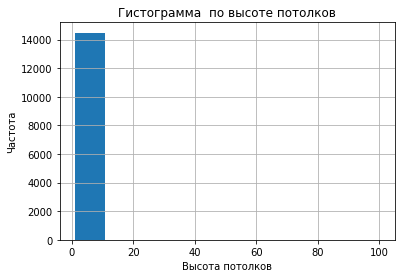

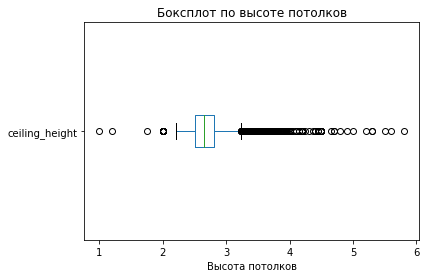

In [21]:
# Высота потолков отсутвует у 39% объявлений. При этом основной массив данных приходится на промежуток между 2,5-3 м
df.ceiling_height.hist()
plt.title('Гистограмма  по высоте потолков')
plt.ylabel('Частота')
plt.xlabel('Высота потолков')
plt.show()
df[df.ceiling_height<6].ceiling_height.plot(kind='box',vert=0)
plt.title('Боксплот по высоте потолков')
plt.xlabel('Высота потолков')
plt.show()

Тем не менее, не стоит забывать, что анализируемая локация - это Санкт-Петербург и окрестности, что говорит о том, что 
в центре часто преобладают дома старого фонда с высокими потолками, а на окраинах - дома-панельки с низкими потолками

In [22]:

df.pivot_table(['ceiling_height'],pd.qcut(df.cityCenters_nearest,10),aggfunc=['count','mean','median'])


,count,mean,median
,ceiling_height,ceiling_height,ceiling_height
cityCenters_nearest,,,
"(180.999, 4766.0]",1227,3.213936,3.10
"(4766.0, 7756.0]",1131,2.996870,3.00
"(7756.0, 10493.5]",1213,2.902366,2.70
"(10493.5, 11908.8]",1159,2.679482,2.60
"(11908.8, 13098.5]",1198,2.663840,2.60
"(13098.5, 14450.0]",1169,2.694739,2.64
"(14450.0, 15616.6]",1198,2.694199,2.60
"(15616.6, 17256.0]",1168,2.625882,2.60


Так и есть. Чем дальше от центра, тем высота потолка сокращается.

In [23]:
# Предлагаю заменить пропущенные значения в домах до 8км от центра высоту потолка - 3м, для тех, кто дальше, устанавливать 
# высоту 2.6м

for i in df[df.cityCenters_nearest<8000][df[df.cityCenters_nearest<8000].ceiling_height.isna()].index:
    df.at[i,'ceiling_height']=3
    
for i in df[df.cityCenters_nearest>=8000][df[df.cityCenters_nearest>=8000].ceiling_height.isna()].index:
    df.at[i,'ceiling_height']=2.6

In [24]:
# После такой замены нам удалось уменьшить количество пропущенных значений в колонке ceiling_height с 9195 до 2575
df.ceiling_height.isna().sum()

2575

Расстояние до аэропорта не указано в 23% объявлений. Возможно, пропуски произошли по причине, что аэропорт находится настолько
далеко от квартиры, что его наличие не влияет на итоговую стоимость недвижимости (например, больше 80км).
Тем не менее, невозможно угадать точное расстояние, поэтому данные пропуски, считаю, невозможно заменить.

Text(0.5, 0, 'Расстояние до аэропорта')

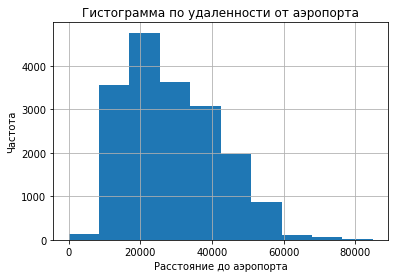

In [25]:
df.airports_nearest.hist()
plt.title('Гистограмма по удаленности от аэропорта')
plt.ylabel('Частота')
plt.xlabel('Расстояние до аэропорта')

В колонке cityCenters_nearest пропущено 23% объявлений. Это произошло по той причине, что для многих населенных пунктов
скорее всего не требуется отмечать близость/дальность к центру  

Так, из 364 населенных пунктов только у 9 пунктов в колонке cityCenters_nearest количество пропущенных значений меньше 100%
Кроме поселка Щеглово и поселка Мурино количество пропущенных значений меньше 1%
Заменить пропуски в 9 населенных пунктов не представляется возможным, так как выявить точную информацию почти нельзя

In [26]:
cities=pd.concat([df.locality_name.value_counts().to_frame(name='Число значений'),
           df[df.cityCenters_nearest.isna()].locality_name.value_counts().to_frame(name='Число пропущенных значений'),
         (df[df.cityCenters_nearest.isna()].locality_name.value_counts()/df.locality_name.value_counts()).to_frame(name='Доля пропущенных значений')],axis=1)

cities[cities['Доля пропущенных значений']<1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Число значений,Число пропущенных значений,Доля пропущенных значений
Колпино,338,1.0,0.002959
Красное Село,178,2.0,0.011236
Кронштадт,96,1.0,0.010417
Ломоносов,133,1.0,0.007519
Пушкин,369,1.0,0.002710
Санкт-Петербург,15721,61.0,0.003880
поселок Мурино,34,32.0,0.941176
посёлок Шушары,440,4.0,0.009091
посёлок Щеглово,23,22.0,0.956522


В колонке days_exposition 13% значений. Такое может произойти по той причине, что к дате выгрузки данных не все квартиры были проданы

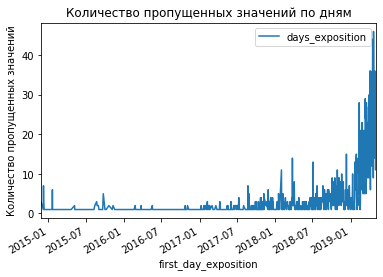

In [27]:
df[df['days_exposition'].isna()][['first_day_exposition','days_exposition']].fillna(1).groupby(by='first_day_exposition').sum().plot()
plt.title('Количество пропущенных значений по дням')
plt.ylabel('Количество пропущенных значений')
plt.show()

Действительно, к окончанию временного ряда количество пропущенных значений увеличивается очень сильно.

Также можно заметить, что с годами days_exposition сокращается, поэтому имеет смысл восстанавливать по медианному значению
в определенный год

In [28]:

expos=df.pivot_table('days_exposition','first_day_exposition',aggfunc=['median','mean']).groupby(pd.Grouper(freq='YS',
                                                                                                     closed='left',
                                                                                                     label='left')).median()

expos['Year']=expos.index.year
expos

,median,mean,Year
,days_exposition,days_exposition,
first_day_exposition,,,
2014-01-01,796.5,818.000000,2014
2015-01-01,598.0,631.806818,2015
2016-01-01,319.5,370.833333,2016
2017-01-01,116.0,165.248922,2017
2018-01-01,67.0,90.598214,2018
2019-01-01,27.5,28.400000,2019


In [29]:
for m in expos.Year:
    y=m
    for i in df[df.first_day_exposition.dt.year==y][df[df.first_day_exposition.dt.year==y].days_exposition.isna()].index:
        df.at[i,'days_exposition']=expos.set_index('Year').at[m,('median', 'days_exposition')]


In [30]:
# Напишем функцию для джойнтплота, которой на входе нужно давать значения анализируемые переменные в кавычках (x,y),название ДатаФрейма,
# вид джойнтплота и название для графика
def joint(x,y,data,kind,title):
    g=sns.jointplot(x=x,y=y,data=data,kind=kind)
    g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
    g.fig.suptitle(title)
    return g.annotate(stats.pearsonr)

В living_area отсутвует 8% значений. Такое может быть по той причине, что пользователи, которые выкладывали объявления, 
не знают точную площадь жилого помещения, либо жилая площадь отсутвует. 

Однако есть четкая зависимость (корелляция на уровне 0,94), что жилая площадь и общая площадь между собой связаны.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


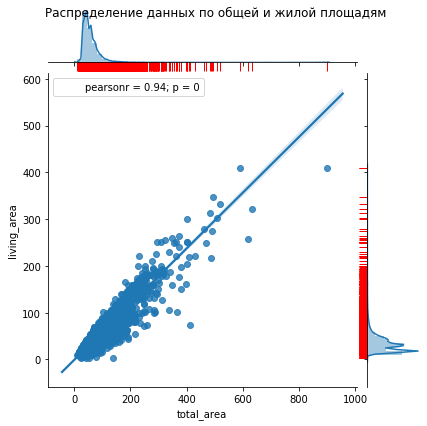

In [31]:
joint('total_area','living_area',df,'reg','Распределение данных по общей и жилой площадям')

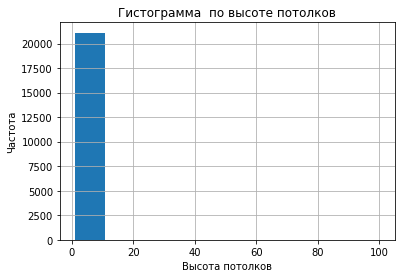

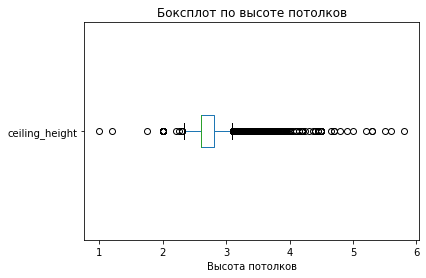

In [32]:
df.ceiling_height.hist()
plt.title('Гистограмма  по высоте потолков')
plt.ylabel('Частота')
plt.xlabel('Высота потолков')
plt.show()
df[df.ceiling_height<6].ceiling_height.plot(kind='box',vert=0)
plt.title('Боксплот по высоте потолков')
plt.xlabel('Высота потолков')
plt.show()

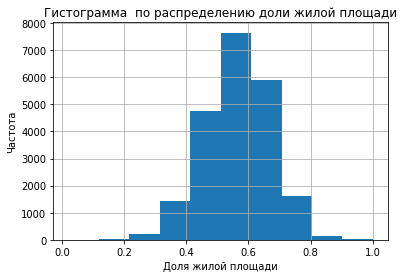

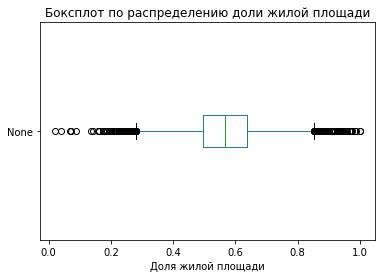

Медианное значение доли жилой площади для выборки 0.5678598992678503


In [33]:
(df['living_area']/df['total_area']).hist()
plt.title('Гистограмма  по распределению доли жилой площади')
plt.ylabel('Частота')
plt.xlabel('Доля жилой площади')
plt.show()
(df['living_area']/df['total_area']).plot(kind='box',vert=0)
plt.title('Боксплот по распределению доли жилой площади')
plt.xlabel('Доля жилой площади')
plt.show()
print('Медианное значение доли жилой площади для выборки {}'.format((df['living_area']/df['total_area']).median()))

Процент жилой площади в имеющихся данных нормально распределен.Поэтому предлагаю заменить пропущенные значения в 
living_area по медианному значению 0.57

In [34]:
p=(df['living_area']/df['total_area']).median()
for i in df[df['living_area'].isna()].index:
    m=df.at[i,'total_area']
    df.at[i,'living_area']=m*p

В столбце kitchen_area 9,6% пропущенных значений.Думаю, что пропуски также могли здесь произойти по тем же причинам,
что и пропуски в living_area. Также нужно иметь в виду, что если квартира является студией, то там кухня отсутствует
Проанализируем также данные

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


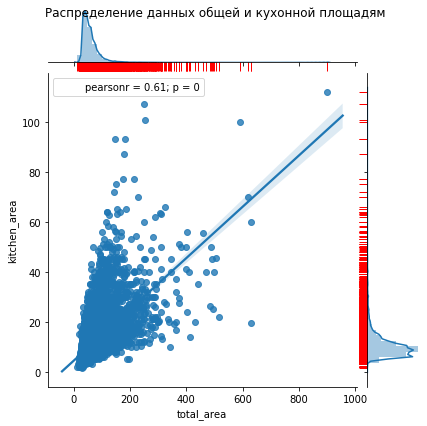

In [35]:
joint('total_area','kitchen_area',df,'reg','Распределение данных общей и кухонной площадям')


В данном случае все намного сложнее (кореляция ниже, а дисперсия возрастает по мере увеличения total_area)

Заменим на 0 в квартирах-студиях площадь кухонь

In [36]:
print(df[df.studio].kitchen_area.sum())
for i in df[df['studio']].index:
    df.at[i,'kitchen_area']=0


0.0


С увеличением количества комнот в квартире площадщь кухонь увеличивается, поэтому предлагаю делать замену исходя из количества 
комнат в квартире, для квартир с количеством комнат больше 6 установить норму в 20кв для кухни

In [37]:
df.pivot_table('kitchen_area','rooms',aggfunc=['mean','median','count'])

,mean,median,count
,kitchen_area,kitchen_area,kitchen_area
rooms,,,
0,0.000000,0.00,138
1,9.535576,9.00,7224
2,9.979584,8.80,7286
3,11.308580,9.50,5380
4,13.664033,11.10,1081
5,18.367649,15.10,285
6,21.048763,19.50,97
7,21.998077,20.00,52


In [38]:
# Количество пропусков по количеству комнат в квартире
df[df['kitchen_area'].isna()].rooms.value_counts()

1    823
2    654
3    434
4     99
0     59
5     41
6      8
7      7
8      3
9      1
Name: rooms, dtype: int64

In [39]:
kitchens=(df[df['kitchen_area'].isna()].rooms.value_counts().to_frame()).join(df.pivot_table('kitchen_area','rooms',aggfunc=['mean','median','count']))
kitchens=kitchens[[('median', 'kitchen_area')]]
kitchens.loc[kitchens.index>6,('median', 'kitchen_area')]=20
kitchens

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,"(median, kitchen_area)"
1,9.0
2,8.8
3,9.5
4,11.1
0,0.0
5,15.1
6,19.5
7,20.0
8,20.0
9,20.0


In [40]:
for r in kitchens.index:
    f=r
    for i in df[df['kitchen_area'].isna()][df[df['kitchen_area'].isna()].rooms==f].kitchen_area.index:
        df.at[i,'kitchen_area']=kitchens.at[r,('median', 'kitchen_area')]    

In [41]:
# Посмотрим, сколько теперь у нас осталось пропущенных значений
pd.concat([df.isna().sum().to_frame(name='Количество пропущенных значений'),
           (df.isna().sum()/len(df)).to_frame(name='Доля пропущенных значений').round(3)],axis=1).sort_values(by='Количество пропущенных значений',ascending=False)

,Количество пропущенных значений,Доля пропущенных значений
parks_nearest,15620,0.659
ponds_nearest,14589,0.616
airports_nearest,5542,0.234
cityCenters_nearest,5519,0.233
ceiling_height,2575,0.109
floors_total,86,0.004
locality_name,49,0.002
total_images,0,0.000
kitchen_area,0,0.000
ponds_around3000,0,0.000


Дубликаты в сете не обнаружены. 

In [42]:
df.duplicated().sum()

0

### Вывод

В ходе проведенной предобработки удалось поменять тип данных в дате, а также произвести замекну пропущенных значений там, где это было возможно. К сожалению, некоторые данные не удалось восстановить, но в то же самое время они не сильно влияют на дальнейший анализ.

### Шаг 3. Посчитайте и добавьте в таблицу

In [43]:
# Цена квадратного метра.Округляем до 2 знака после запятой, так как в рубле только 100 копеек

df['price_per_m']=round(df['last_price']/df['total_area'],2)

In [44]:
# День недели, месяц и год публикации объявления

df['weekday']=df['first_day_exposition'].dt.weekday
df['month']=df['first_day_exposition'].dt.month
df['year']=df['first_day_exposition'].dt.year

In [45]:
# Этаж квартиры; варианты — первый, последний, другой

df['floor_category']=np.nan
df.loc[df['floor']==1,'floor_category']='первый'
df.loc[df['floor']==df['floors_total'],'floor_category']='последний'
df['floor_category']=df['floor_category'].fillna('другой')

df['floor_category'].value_counts()

другой       17446
последний     3361
первый        2892
Name: floor_category, dtype: int64

In [46]:
# Соотношение жилой и общей площади, а также отношение площади кухни к общей
# Выше это было проанализировано

df['living_area_ratio']=df['living_area']/df['total_area']
df['kitchen_area_ratio']=df['kitchen_area']/df['total_area']

### Вывод

В ходе данного этапа в имеющийся сет данных были добавлены новые столбцы: Цена за квадратный метр, месяц, год и день недели,
категория этажа (первый, последний и другой), а также соотношение жилой площади и площади кухни.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра

##### Изучаем площадь

Из приведенного графика можно заметить, что существуют очень большие значения, которые вызодит за пределы 25% квартиля

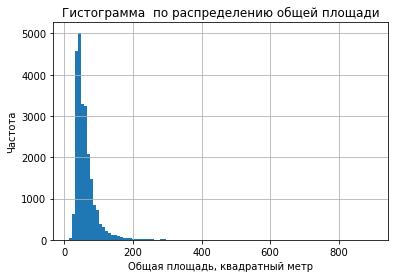

Text(0.5, 0, 'Общая площадь, квадратный метр')

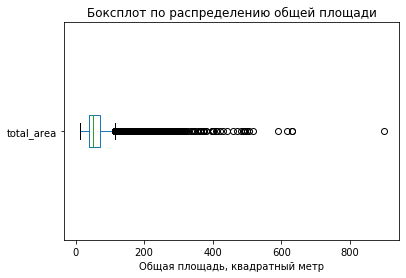

In [71]:
df['total_area'].hist(bins=100)
plt.title('Гистограмма  по распределению общей площади')
plt.ylabel('Частота')
plt.xlabel('Общая площадь, квадратный метр')
plt.show()
df['total_area'].plot(kind='box',vert=0)
plt.title('Боксплот по распределению общей площади')
plt.xlabel('Общая площадь, квадратный метр')

In [72]:
# Напишем функцию для поиска аномальных явлений, ограниченных сверху
# col1 - столбец для записи аномальных явлений
# col2 - анализируемй столбец
def anomHigh(col1,col2):
    df[col1]=np.nan
    df.loc[df[col2]>df[col2].quantile(0.75)+1.5*(df[col2].quantile(0.75)-df[col2].quantile(0.25)),col1]=True
    return print('В выбросы попало {} наблюдений, или {:.0%}'.format(df[col1].sum(),
                                                                   (df[col1].sum()/len(df))))



In [81]:
# 'anomal_big_price','last_price'
col1='anomal_big_price'
col2='ceiling_height'
df[col1]=np.nan
df.loc[df[col2]>df[col2].quantile(0.75)+1.5*(df[col2].quantile(0.75)-df[col2].quantile(0.25)),col1]=True
print('В выбросы попало {} наблюдений, или {:.0%}'.format(df[col1].sum(),
                                                                   (df[col1].sum()/len(df))))

В выбросы попало 1419 наблюдений, или 6%


In [82]:
# df[col2]>
df[col2].quantile(0.75)+1.5*(df[col2].quantile(0.75)-df[col2].quantile(0.25))

3.0999999999999996

In [73]:
# Для общей площади найдем выбросы
anomHigh('anomal_big','total_area')

В выбросы попало 1240 наблюдений, или 5%


По гистограмме после того, как мы убрали выбросы можно теперь заметить, что наиболее часто встречающаяся квартира имеет площадь 
от 30 до 50 квадратных метров

Text(0.5, 0, 'Общая площадь, квадратный метр')

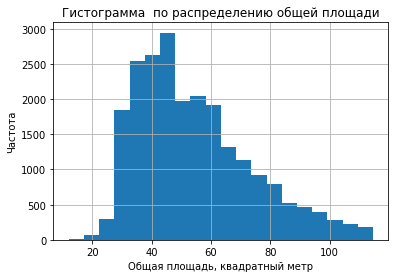

In [50]:
df[df.anomal_big.isna()]['total_area'].hist(bins=20)
plt.title('Гистограмма  по распределению общей площади')
plt.ylabel('Частота')
plt.xlabel('Общая площадь, квадратный метр')

##### Изучаем цены

Здесь мы видим также очень много аномально больших выбросов. Проведем тот же самый анализ


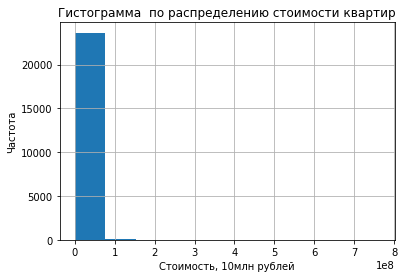

Text(0.5, 0, 'Стоимость, 100млн рублей')

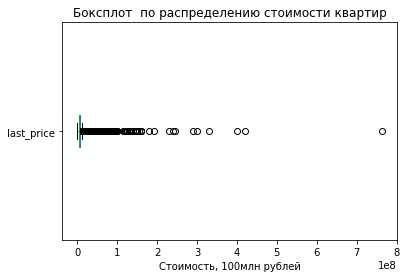

In [51]:
df['last_price'].hist(bins=10)
plt.title('Гистограмма  по распределению стоимости квартир')
plt.ylabel('Частота')
plt.xlabel('Стоимость, 10млн рублей')
plt.show()
df['last_price'].plot(kind='box',vert=0)
plt.title('Боксплот  по распределению стоимости квартир')
plt.xlabel('Стоимость, 100млн рублей')

In [52]:
anomHigh('anomal_big_price','last_price')

В выбросы попало 2034 наблюдений, или 9%


После того, как мы убрали аномальные цены можно теперь увидеть, что чаще всего встречается цена, равная 4млн рублей.
Тем не менее не стоит забывать тот факт, что в выборке представлены не только Спб, но и другие населения пункты, а также
временной промежуток, равный 4 году, а цены, представленные в анализе являются номинальными (то есть не приведенные к какому-то
одному году, поэтому анализ не учитывает инфляцию)

Text(0.5, 0, 'Стоимость, 10млн рублей')

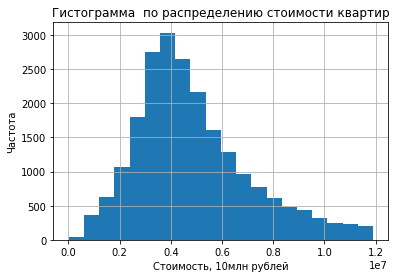

In [53]:
df[df.anomal_big_price.isna()]['last_price'].hist(bins=20)
plt.title('Гистограмма  по распределению стоимости квартир')
plt.ylabel('Частота')
plt.xlabel('Стоимость, 10млн рублей')

##### Изучаем число комнат

Болшьше всего представлено на рынке 1- и 2-комнатные квартиры, чуть в меньшей степени 3-комнатные квартиры


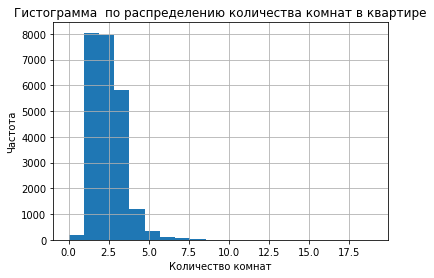

Text(0.5, 0, 'Количество комнат')

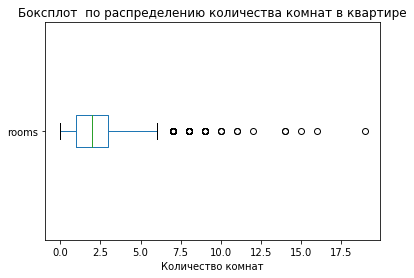

In [54]:
df['rooms'].hist(bins=20)
plt.title('Гистограмма  по распределению количества комнат в квартире')
plt.ylabel('Частота')
plt.xlabel('Количество комнат')
plt.show()
df['rooms'].plot(kind='box',vert=0)
plt.title('Боксплот  по распределению количества комнат в квартире')
plt.xlabel('Количество комнат')

In [55]:
anomHigh('anomal_big_rooms','rooms')

В выбросы попало 90 наблюдений, или 0%


Text(0.5, 0, 'Количество комнат')

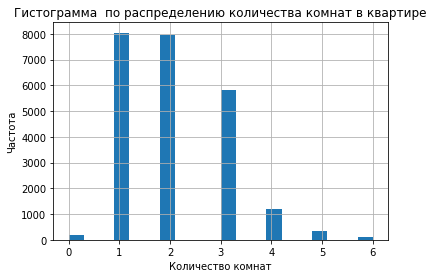

In [56]:
# После того, как убрали выбросы (все квартиры больше 6 комнат), получили тот же самый результат
df[df.anomal_big_rooms.isna()]['rooms'].hist(bins=20)
plt.title('Гистограмма  по распределению количества комнат в квартире')
plt.ylabel('Частота')
plt.xlabel('Количество комнат')

##### Изучаем высоту потолков

В имеющемся сете имеется 1 квартира, у которой высота потолков - 100 метров. Это безусловно аномалия.
После того, как убрали квартиру с потолком ~100м, на боксплоте можно увидеть, что аномальные значения имеются не только
сверху, но и снизу

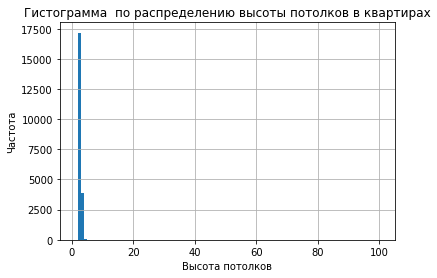

Text(0.5, 0, 'Высота потолков')

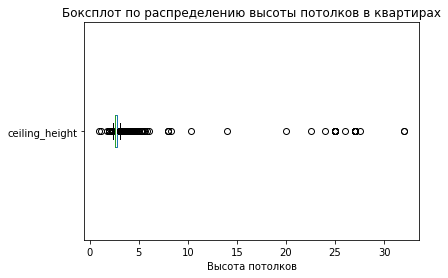

In [57]:
df['ceiling_height'].hist(bins=100)
plt.title('Гистограмма  по распределению высоты потолков в квартирах')
plt.ylabel('Частота')
plt.xlabel('Высота потолков')
plt.show()
df[df['ceiling_height']<90]['ceiling_height'].plot(kind='box',vert=0)
plt.title('Боксплот по распределению высоты потолков в квартирах')
plt.xlabel('Высота потолков')

In [84]:
df['ceiling_height'].describe()[4]-1.5*(df['ceiling_height'].describe()[6]-df['ceiling_height'].describe()[4])

2.3000000000000007

In [58]:
anomHigh('anomal_big_ceiling','ceiling_height')
df.loc[df['ceiling_height']<df['ceiling_height'].describe()[4]-1.5*(df['ceiling_height'].describe()[6]-df['ceiling_height'].describe()[4]),'anomal_big_ceiling']=True
print('В выбросы с учетому аномалий снизу попало {} наблюдений, или {:.0%}'.format(df['anomal_big_ceiling'].sum(),
                                                         df['anomal_big_ceiling'].sum()/len(df)))

В выбросы попало 1419 наблюдений, или 6%
В выбросы с учетому аномалий снизу попало 1439 наблюдений, или 6%


После удаления аномальных значений можно увидеть, что средняя высота потолков на уровне 2,5-2,6м

Text(0.5, 0, 'Высота потолков')

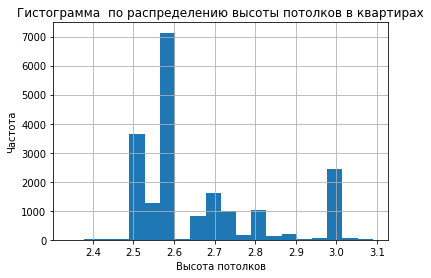

In [59]:
df[df.anomal_big_ceiling.isna()]['ceiling_height'].hist(bins=20)
plt.title('Гистограмма  по распределению высоты потолков в квартирах')
plt.ylabel('Частота')
plt.xlabel('Высота потолков')

In [60]:
# Теперь посмотрим, сколько получилось аномальных данных
df['Anomal']=df[['anomal_big', 'anomal_big_price', 'anomal_big_rooms',
       'anomal_big_ceiling']].sum(axis=1)

df['Anomal'].value_counts(normalize=True)
# Итого из проведенного анализа мы смогли обнаружить 13% аномальных данных, которые бы повлияли на результаты

0.0    0.871260
1.0    0.073927
2.0    0.037808
3.0    0.014895
4.0    0.002110
Name: Anomal, dtype: float64

Таким образом, получаем, что медианная квартира - это квартира площадью 45кв метров, высотой потолков 2,6м, с 1 комнатой и 
стоимостью 4млн рублей

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e53320f50>,
      dtype=object)

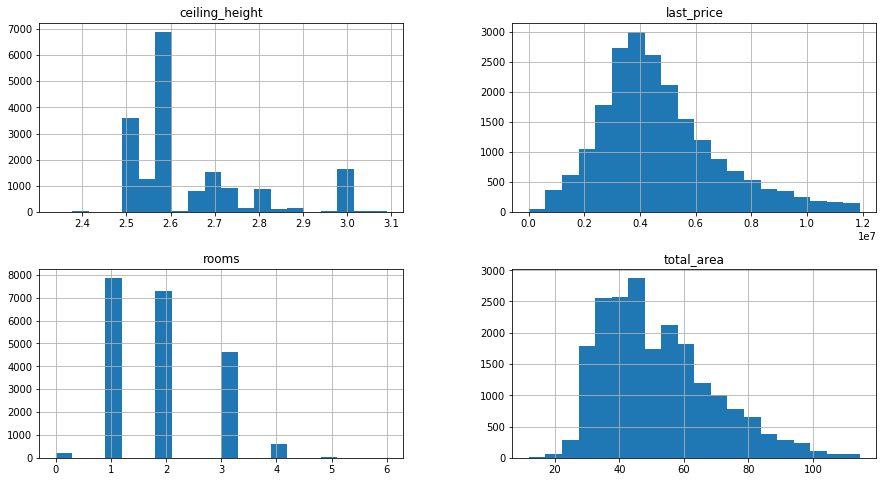

In [61]:
df[df['Anomal']==0][['total_area','last_price','rooms','ceiling_height']].hist(bins=20,figsize=(15,8))

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

В целом продажи происходят быстро (пик не в нуле, а чуть подальше [похоже на распределение хи-квадрата])


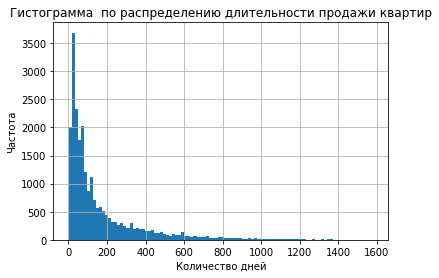

Text(0.5, 0, 'Количество дней')

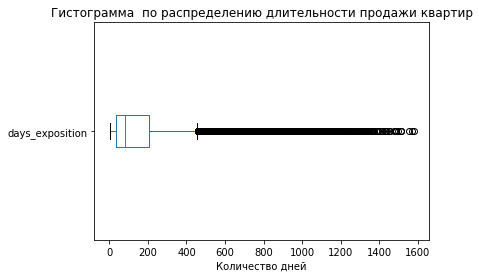

In [62]:
df['days_exposition'].hist(bins=100)
plt.title('Гистограмма  по распределению длительности продажи квартир')
plt.ylabel('Частота')
plt.xlabel('Количество дней')
plt.show()
df['days_exposition'].plot(kind='box',vert=0)
plt.title('Гистограмма  по распределению длительности продажи квартир')
plt.xlabel('Количество дне

In [63]:
anomHigh('anomal_big_exposition','days_exposition')

В выбросы попало 2156 наблюдений, или 9%


В среднем квартира продается за 50-70 дней  

Text(0.5, 0, 'Количество дней')

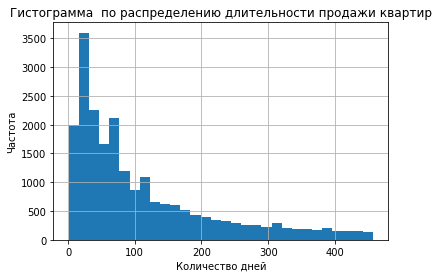

In [64]:

df[df.anomal_big_exposition.isna()]['days_exposition'].hist(bins=30)
plt.title('Гистограмма  по распределению длительности продажи квартир')
plt.ylabel('Частота')
plt.xlabel('Количество дней')

Быстро квартира продается, если она продается за 1 месяц
Можно сказать, что продажа квартиры затянулась, если она продается более, чем за 155 дней

In [65]:
df[df.anomal_big_exposition.isna()]['days_exposition'].describe()

count    21543.000000
mean       111.421181
std        106.879920
min          1.000000
25%         30.000000
50%         67.000000
75%        155.000000
max        457.000000
Name: days_exposition, dtype: float64

В мае квартира в среднем будет продаваться дольше. Возможно, это связано с праздниками   

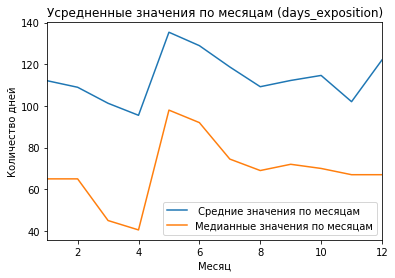

In [66]:
df[df['anomal_big_exposition'].isna()].pivot_table('days_exposition','month',aggfunc=['mean','median']).plot()
plt.title('Усредненные значения по месяцам (days_exposition)')
plt.ylabel('Количество дней')
plt.xlabel('Месяц')
plt.legend([' Средние значения по месяцам','Медианные значения по месяцам'])

Квартиру на первом этаже придется продавать дольше 

In [67]:

df[df['anomal_big_exposition'].isna()].pivot_table('days_exposition','floor_category',aggfunc=['mean','median'])

,mean,median
,days_exposition,days_exposition
floor_category,,
другой,108.890713,67.0
первый,123.373410,79.0
последний,114.493382,70.0


При этом чем больше парков, тем дольше будет продаваться квартира

In [68]:

df[df['anomal_big_exposition'].isna()].pivot_table('days_exposition','parks_around3000',aggfunc=['mean','median'])

,mean,median
,days_exposition,days_exposition
parks_around3000,,
0.0,109.531062,67.0
1.0,113.533204,70.0
2.0,114.664504,71.0
3.0,131.536804,90.0


### Уберите редкие и выбивающиеся значения

Создадим сет с данными без аномалий, который будем использовать в дальнейшем


In [69]:
df['Anomal']=df[['Anomal','anomal_big_exposition']].sum(axis=1)
df1=df[df.Anomal==0]

In [70]:
len(df1)

18969

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Площадь квартиры не всегда влияет на ее стоимость (кореляция среднеумеренная)


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


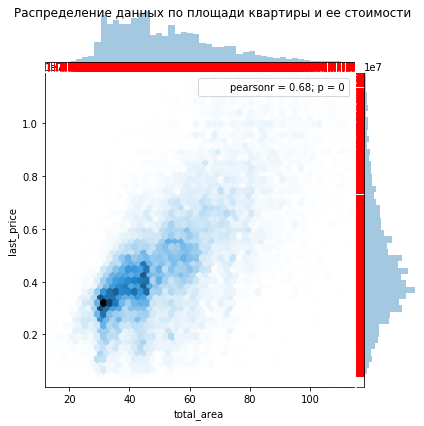

In [67]:
joint('total_area','last_price',df1,'hex','Распределение данных по площади квартиры и ее стоимости')

Чем дальше от центра, тем квартира дороже стоит, но данный факт подтверждается не всегда (корреляция средняя -0.3)

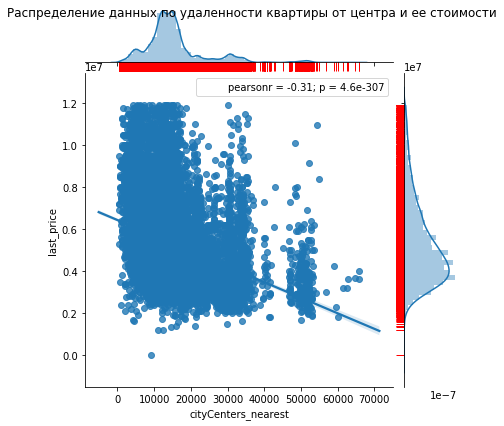

In [68]:
joint('cityCenters_nearest','last_price',df1,'reg','Распределение данных по удаленности квартиры от центра и ее стоимости')

Однако распределение цен квартир на этажах, отличающихся от первого и последнего, немного сдвинуто вправо, что говорит о том,
что квартиры на других этажах незначительно дороже. 

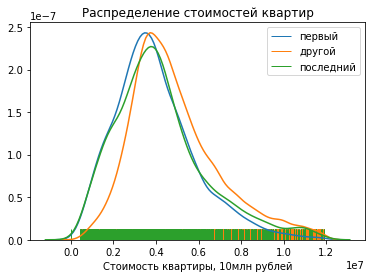

In [69]:
# Пики не отличаются от типа этажа (примерно для всех трех групп на уровне 4млн)
for i in df1.floor_category.unique():
    sns.distplot(df1[df1.floor_category==i]['last_price'],hist=False, rug=True)
plt.legend(['первый', 'другой', 'последний'])
plt.xlabel('Стоимость квартиры, 10млн рублей')
plt.title('Распределение стоимостей квартир')
plt.show()



Судя по распределениям, день недели, когда было выложено объявление, не сильно влияет на стоимость квартиры


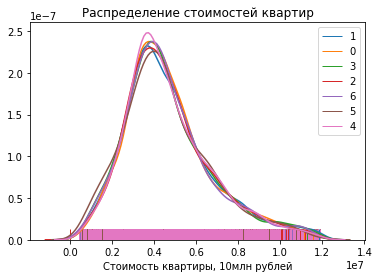

In [70]:
for i in df1.weekday.unique():
    sns.distplot(df1[df1.weekday==i]['last_price'],hist=False, rug=True)
plt.legend(df1.weekday.unique())
plt.xlabel('Стоимость квартиры, 10млн рублей')
plt.title('Распределение стоимостей квартир')
plt.show()

Месяц также сильно не влияет на стоимость квартиры

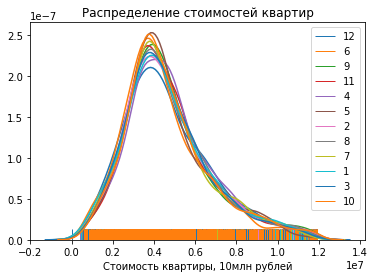

In [71]:

for i in df1.month.unique():
    sns.distplot(df1[df1.month==i]['last_price'],hist=False, rug=True)
plt.legend(df1.month.unique())
plt.xlabel('Стоимость квартиры, 10млн рублей')
plt.title('Распределение стоимостей квартир')
plt.show()

Год влияет сильно стоимость квартир. Вполне возможно, что это связано с инфляцией. Но в распределение стоимостей 2018 и 2019 гг отличается
от других годов. Так пик в 2018 немного сдвинут влево, что говорит о том, что в 2018 цены на недвижимость немного опустились. 
А в 2019 году распределение, наоборот, немного было сдвинуто вправо, что говорит о росте цены. 

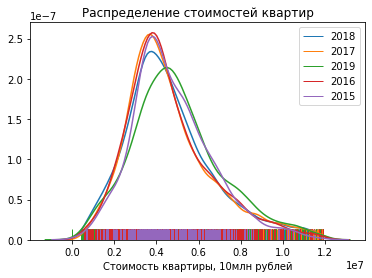

In [72]:

for i in df1.year.unique():
    sns.distplot(df1[df1.year==i]['last_price'],hist=False, rug=True)
    
plt.legend(df1.year.unique())
plt.xlabel('Стоимость квартиры, 10млн рублей')
plt.title('Распределение стоимостей квартир')
plt.show()

Количество комнат положительно влияет на цену. Чем больше комнат, тем выше цена

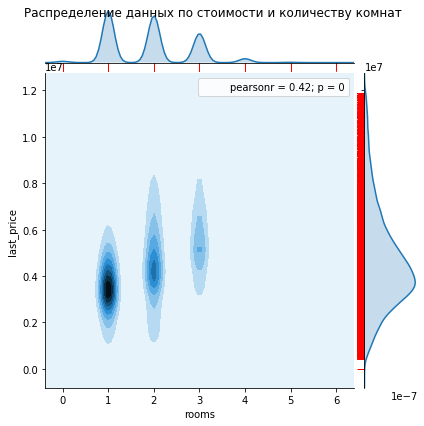

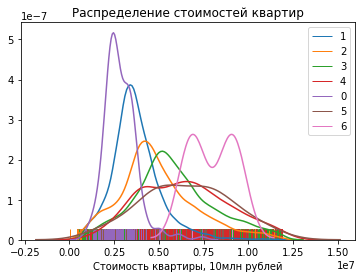

In [73]:
joint('rooms','last_price',df1,'kde','Распределение данных по стоимости и количеству комнат')
plt.show()

for i in df1.rooms.unique():
    sns.distplot(df1[df1.rooms==i]['last_price'],hist=False, rug=True)
plt.legend(df1.rooms.unique())
plt.xlabel('Стоимость квартиры, 10млн рублей')
plt.title('Распределение стоимостей квартир')
plt.show()

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [74]:
# Топ 10
tops=df1.groupby(by='locality_name')['last_price'].count().sort_values(ascending=False)[:10].index
tops

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'посёлок Парголово', 'Колпино', 'Пушкин', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object', name='locality_name')

Text(0.5, 1.0, 'Средняя цена за квадратный метр в топ-10 городах')

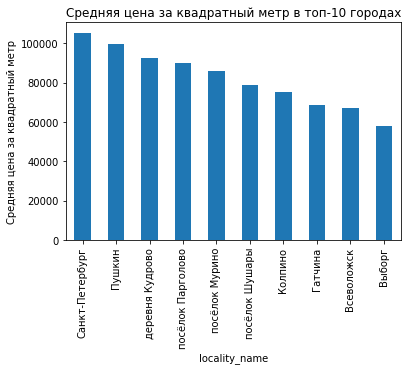

In [75]:
# Посчитать среднюю стоимость за квадратный метр можно несколькими способами. 
df1.query('locality_name in @tops').groupby(by='locality_name')['price_per_m'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Средняя цена за квадратный метр')
plt.title('Средняя цена за квадратный метр в топ-10 городах')

Text(0.5, 1.0, 'Средняя цена за квадратный метр в топ-10 городах')

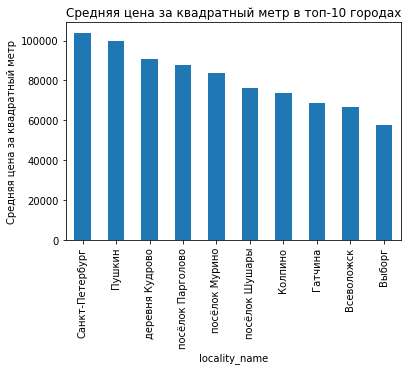

In [76]:
# Тем не менее, оба способа дают одинаковые результаты. 

(df1.query('locality_name in @tops').groupby(by='locality_name')['last_price'].sum()/df1.query('locality_name in @tops').groupby(by='locality_name')['total_area'].sum()).sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Средняя цена за квадратный метр')
plt.title('Средняя цена за квадратный метр в топ-10 городах')

Самые дорогие квартиры находятся в Санкт-Петербурге и Пушкине. Самые дешевые - в Выборге и Всеволожске. 

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [77]:
dataSPB=df1[df1.locality_name=='Санкт-Петербург']
dataSPB.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,year,floor_category,living_area_ratio,kitchen_area_ratio,anomal_big,anomal_big_price,anomal_big_rooms,anomal_big_ceiling,Anomal,anomal_big_exposition
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2018,другой,0.320000,0.410000,NaN,NaN,NaN,NaN,0.0,NaN
7,5,7915000.0,71.6,2019-04-18,2,2.60,24.0,40.658769,22,False,...,2019,другой,0.567860,0.263966,NaN,NaN,NaN,NaN,0.0,NaN
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.600000,7,False,...,2017,другой,0.714754,0.106557,NaN,NaN,NaN,NaN,0.0,NaN
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.300000,3,False,...,2017,другой,0.512626,0.214646,NaN,NaN,NaN,NaN,0.0,NaN
15,16,4650000.0,39.0,2017-11-18,1,2.60,14.0,20.500000,5,False,...,2017,другой,0.525641,0.194872,NaN,NaN,NaN,NaN,0.0,NaN


In [78]:
dataSPB['cityCenters_nearest_kms']=round(dataSPB['cityCenters_nearest']/1000,0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


В целом можно увидеть, что существует 3 группы квартир по удаленности от центра. 
1 группа - центр (до 8 км), цена варьируется от 6 до 8 млн. 
2 группа - 9-20 км, цена варьируется на уровне 4-5 млн.
3 группа - свыше 20 км, цены разбросаны от 2 до 6 млн. 

Text(0.5, 0, 'км')

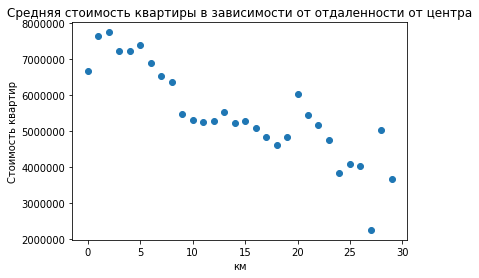

In [79]:

plt.scatter(x=dataSPB.groupby(by='cityCenters_nearest_kms')['last_price'].mean().index,
           y=dataSPB.groupby(by='cityCenters_nearest_kms')['last_price'].mean())
plt.title('Средняя стоимость квартиры в зависимости от отдаленности от центра')
plt.ylabel('Стоимость квартир')
plt.xlabel('км')

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?


In [80]:
dataSPBcenter=dataSPB[dataSPB.cityCenters_nearest_kms<=8]

В большинстве потолки в центре Петербурга составляют 3м (возможно, такое произошло по той причине, что замена данных происходила
по принципу отдаленности от центра). 
В среднем цены в центре Петребурга выше (чаще всего 6-7млн рублей)
В основном в центре Санкт-Петербурга представлены 2-хкомнатные квартиры, а распределение между 1 и 3-хкомнатными квартирами
примерно одинаково
По площади пик приходится на 60м, но есть большой выбивающийся пик на 45-50м. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c8621bf10>,
      dtype=object)

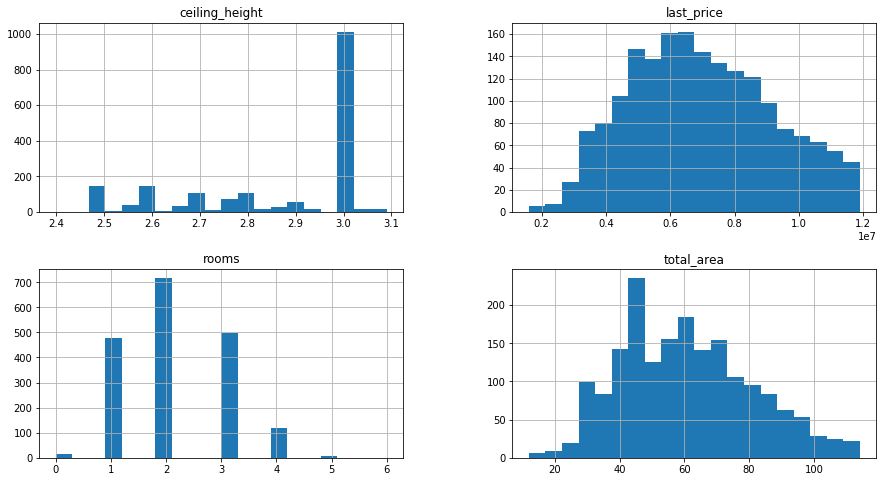

In [81]:
dataSPBcenter[['total_area','last_price','rooms','ceiling_height']].hist(bins=20,figsize=(15,8))

На данном графике заметно, что количество комнат сильно влияет на стоимость квартиры в центре. 
Очевидно, что самые дешевыми квартирами с медианным значением в 2.5млн оказались квартиры-студии. Самыми дорогими (за 11млн) оказались
квартиры с 6 комнатами. 
Однако разброс по цене однокмнатных квартир оказался довольно обширным (пик проходит на промежутке между 3.5 и 6 млн за квартиру, 
распределение больше бимодально)
Медианная стоимость двухкомнатной квартиры составляет примерно 5млн  

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


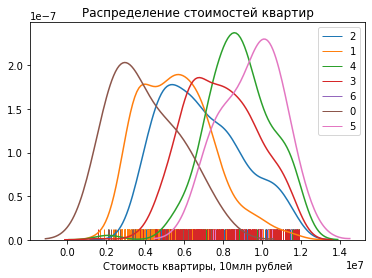

In [82]:
for i in dataSPBcenter.rooms.unique():
    sns.distplot(dataSPBcenter[dataSPBcenter.rooms==i]['last_price'],hist=False, rug=True)
plt.legend(dataSPBcenter.rooms.unique())
plt.xlabel('Стоимость квартиры, 10млн рублей')
plt.title('Распределение стоимостей квартир')
plt.show()


Хоть кореляция оказалась статистически значимой, тем не менее, коэффициент -0.17 не дает оснований говорить о том, что 
удаленность от центра действительно сильно влияет на стоимость квартиры в центре Санкт-Петербурга. 
Это отчетливо заметно на графике. Распределение в виде такого квадратного облака позволяет нам утверждать о том,
что сильной взаимосвязи нет. 

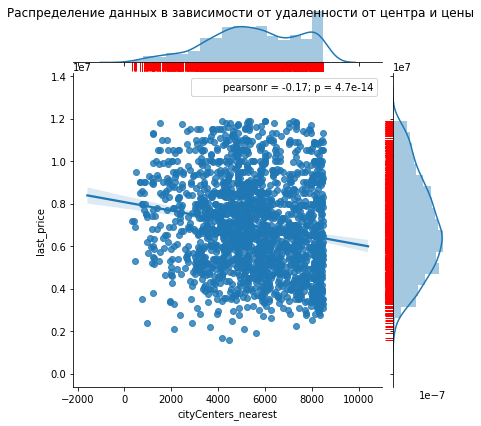

In [83]:
joint('cityCenters_nearest','last_price',dataSPBcenter,'reg','Распределение данных в зависимости от удаленности от центра и цены')

Как можно заметить, категория этажа сильно влияет на продажи. Самыми дешевыми квартирами оказались квартиры на первом этаже. 
Их медианная стоимость составляет 5млн рублей.
Различие между последним и другим этажами не сильно заметно, однако медианная стоимость другого этажа чуточку выше (6млн против 7млн)


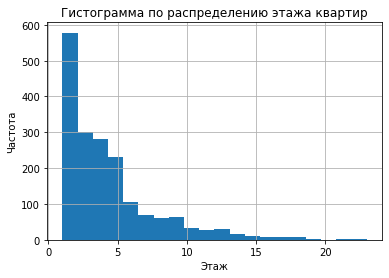

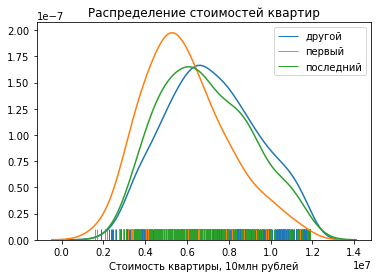

In [84]:

dataSPBcenter.floor.hist(bins=20)
plt.title('Гистограмма по распределению этажа квартир')
plt.xlabel('Этаж')
plt.ylabel('Частота')
plt.show()
# Даже в центре Санкт-Петербурга представлено довольное разнообразное количество квартир на разных этажах, поэтому предлагаю
# проанализировать влияние этажа на стоимость квартиры через переменную floor_category
for i in dataSPBcenter.floor_category.unique():
    sns.distplot(dataSPBcenter[dataSPBcenter.floor_category==i]['last_price'],hist=False, rug=True)
plt.legend(dataSPBcenter.floor_category.unique())
plt.xlabel('Стоимость квартиры, 10млн рублей')
plt.title('Распределение стоимостей квартир')
plt.show()



В целом взаимосвязь между высотой потолков и стоимостью квартир в центре Санкт-Петербурга незначительная

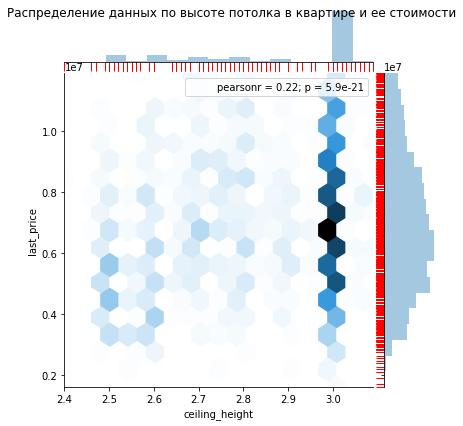

In [85]:
joint('ceiling_height','last_price',dataSPBcenter,'hex','Распределение данных по высоте потолка в квартире и ее стоимости')

В целом на стоимость квартиры год не сильно влияет. Однако фактор инфляции присутствует. Так, распределение 2019 немного сдвинуто
влево, что говорит о том, что квартиры, продававшиеся в этот год, были дешевле. 
А Распределение 2019 года немного сдвинуто вправо, что говорит о том, что цены на квартиры были дороже в 2019 в отличие от других годов

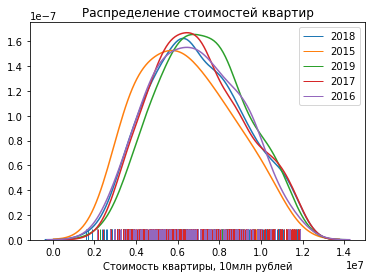

In [86]:


for i in dataSPBcenter.year.unique():
    sns.distplot(dataSPBcenter[dataSPBcenter.year==i]['last_price'],hist=False, rug=True)
plt.legend(dataSPBcenter.year.unique())
plt.xlabel('Стоимость квартиры, 10млн рублей')
plt.title('Распределение стоимостей квартир')
plt.show()

Квартиры в июне оказались самыми дешевыми

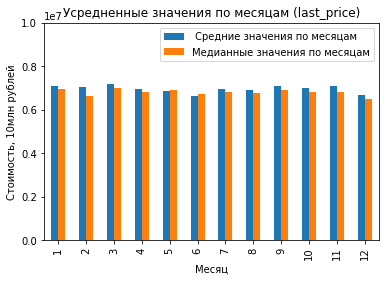

In [87]:

dataSPBcenter.pivot_table('last_price','month',aggfunc=['mean','median']).plot(kind='bar')
plt.ylim(0,1e7)
plt.title('Усредненные значения по месяцам (last_price)')
plt.ylabel('Стоимость, 10млн рублей')
plt.xlabel('Месяц')
plt.legend([' Средние значения по месяцам','Медианные значения по месяцам'])

Квартиры по вс оказались самыми дорогими. Возможно, это связано с тем, что продажами квартир люди обычно занимаются в свободное
от работы время. 

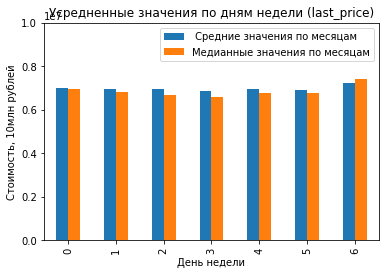

In [88]:

dataSPBcenter.pivot_table('last_price','weekday',aggfunc=['mean','median']).plot(kind='bar')
plt.ylim(0,1e7)
plt.title('Усредненные значения по дням недели (last_price)')
plt.ylabel('Стоимость, 10млн рублей')
plt.xlabel('День недели')
plt.legend([' Средние значения по месяцам','Медианные значения по месяцам'])

### Шаг 5. Общий вывод

    В ходе анализа квартир было проведено исследование в несколько шагов. На первом этапе проанализировано количество пропусков и их причины. После данного шага удалось значительно уменьшить пропуски, восстановить данные, которые в дальнейшем не позволили бы выборке сместиться и привести к недостоверным выводам. 

    На следующем этапе были добавлены некоторые переменные, среди которых, например, стоимость квадратного метра, год, месяц и день недели публикации объявлений, доли жилой площади и кухонь. 
    
    На третьем этапе были проанализированы площадь квартир, цена, число комнат, высота потолков и длительность продажи квартиры на наличие аномальных данных. Так, например, количество аномально больших кварти по площади составляло 5% от всей выборки, в то время как по стоимости аномально дорогие квартиры составляли 9%. Квартиры с количеством комнат более 6 также оказалось выбросами, из-за чего от них пришлось отказаться в дальнейшем анализе. Квартиры с высотой потолков от 2.4 до 3.1м составляли основной массив данных, в то время как свыше 1400 наблюдений с нереалистичными высотами потолков также оказались выбросами в данных. 
    Обычно продажа квартир происходит в течение 50-70 дней. Быстрая продажа - это продажа менее, чем за 1 месяц, долгая продажа - продажа более чем за 5 месяцев. 
    
    После того, как удалось убрать аномальные данные, оказался усредненный вариант квартиры по выборке:  площадью 45кв метров, высотой потолков 2,6м, с 1 комнатой и стоимостью 4млн рублей. 
    
    В ходе дальнейшего анализа удалось выявить, что основным факторами, влияющими на стоимость квартиры является ее площадь (корреляция на уровне 0.68), ее удаленность от центра (чем дальше, тем дешевле), количество комнат (чем больше комнат, тем дороже), а также этаж (квартиры на первых и последних этажах дороже). 

    Среди популярных населенных пунктов самыми дорогими квартиры оказались в Санкт-Петербурге и Пушкине, в то время как в Выборге они оказались самыми дешевыми. 
    
    В ходе анализа удалось выявить центр Санкт-Петербурга и выявить медианную квартиру для данной локации. Центром Петербурга была названа локация, ограниченная 8 км. Квартиры там существенно отличаются от медианной квартиры, описанной выше по всей выборке. Так, в центре Петербурга высота потолков составляет 3м, в основном они стоят 6-7 млн, а представлены чаще всего на рынке недвижимости 2-хкомнатные квартиры. Соответственно, площадь таких квартир больше (60 м).
    На стоимость квартир в центре Петербурга влияют количество комнат и этаж, в то время как высота потолков и удаленность от центра влияют в меньшей степени. 

